# Missing Categorical Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load the dataset and select columns
df = pd.read_csv('../Dataset/train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [ ]:
# display the first few rows of the dataframe
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [8]:
# check for missing values percentage in each column
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

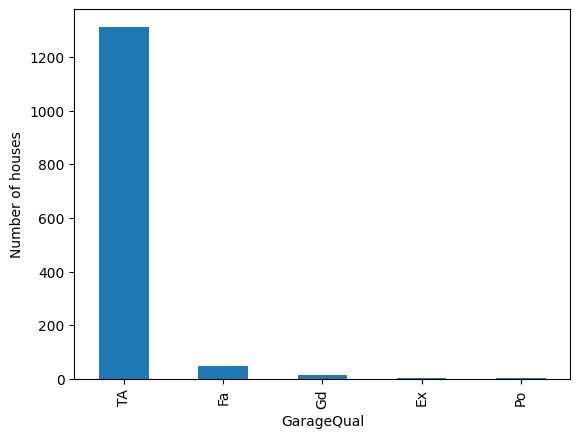

In [9]:
# plot the value counts of 'GarageQual' column
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel('Number of houses')

In [10]:
# find the mode of 'GarageQual' column
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

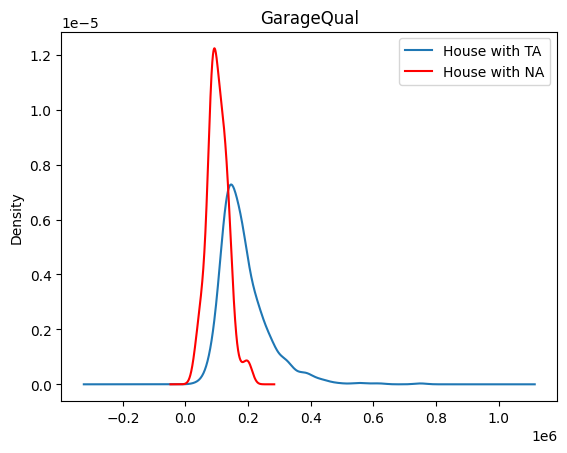

In [11]:
# plot the KDE of SalePrice for houses with 'TA' GarageQual and missing GarageQual
fig= plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] =='TA']['SalePrice'].plot(kind='kde', ax= ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels= ax.get_legend_handles_labels()
labels= ['House with TA', 'House with NA']
ax.legend(lines, labels, loc='best')
plt.title('GarageQual')

In [12]:
# Select the 'SalePrice' values for rows where 'GarageQual' is 'TA'
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [13]:
# Fill missing values in the 'GarageQual' column with 'TA' (Typical/Average)
df['GarageQual'].fillna('TA', inplace=True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_9680\2877438849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

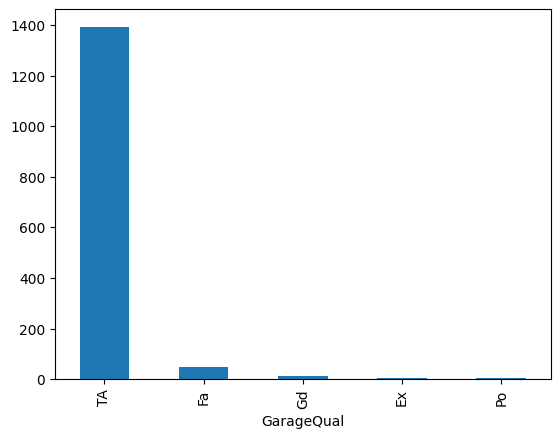

In [14]:
# Plot a bar chart showing the count of each category in the 'GarageQual' column
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

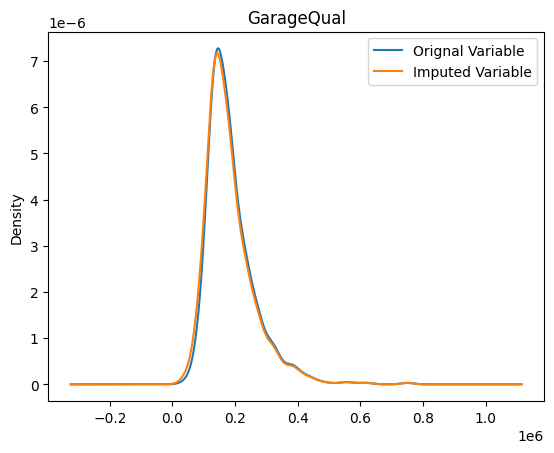

In [15]:
# plot the KDE of SalePrice for original and imputed 'GarageQual' values
fig= plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)

df[df['GarageQual'] =='TA']['SalePrice'].plot(kind='kde', ax= ax)

lines, labels= ax.get_legend_handles_labels()
labels= ['Orignal Variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

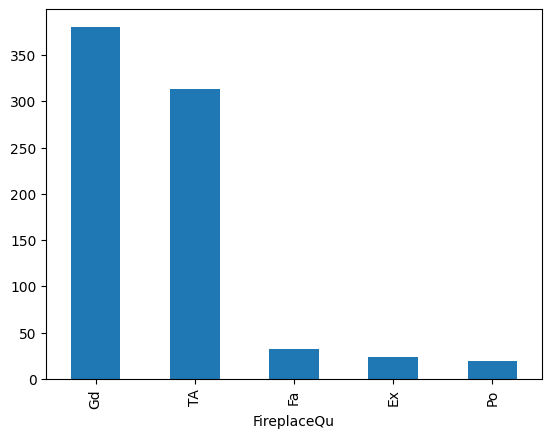

In [16]:
# Plot a bar chart showing the count of each category in the 'FireplaceQu' column
df['FireplaceQu'].value_counts().plot(kind='bar')

In [17]:
# Find the mode of 'FireplaceQu' column
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

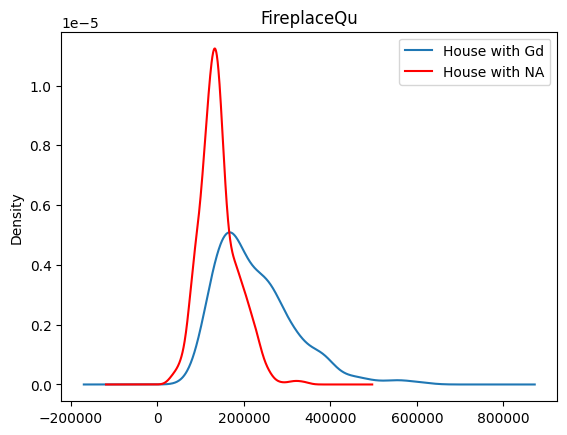

In [19]:
# Compare the distribution of 'SalePrice' for houses with 'FireplaceQu' = 'Gd' vs missing values
fig = plt.figure()
ax = fig.add_subplot(111)

# KDE plot for houses with 'FireplaceQu' = 'Gd'
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax)

# KDE plot for houses with missing 'FireplaceQu'
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# Customize legend
lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels, loc='best')

# Set title
plt.title('FireplaceQu')

In [20]:
# Select 'SalePrice' values for houses where 'FireplaceQu' is 'Gd'
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [21]:
# Fill missing values in the 'FireplaceQu' column with 'Gd' (Good)
df['FireplaceQu'].fillna('Gd', inplace=True)

C:\Users\FAHAD\AppData\Local\Temp\ipykernel_9680\793158535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

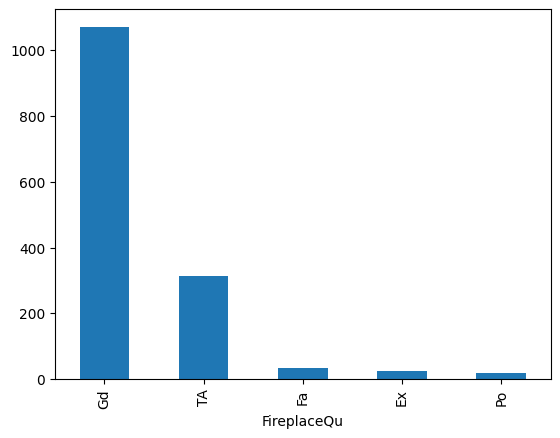

In [22]:
# Plot a bar chart showing the count of each category in the 'FireplaceQu' column
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

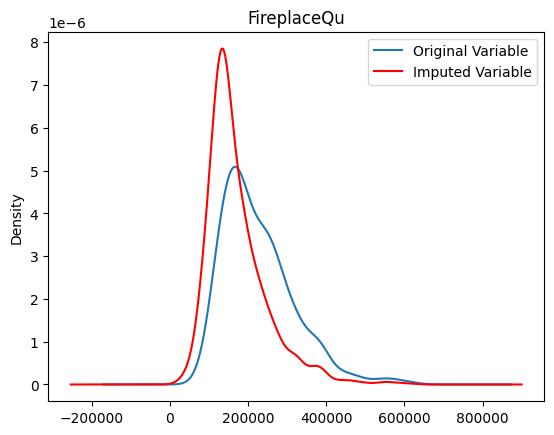

In [23]:
# Compare the distribution of 'SalePrice' before and after imputing 'FireplaceQu'
fig = plt.figure()
ax = fig.add_subplot(111)

# KDE plot for the original variable
temp.plot(kind='kde', ax=ax)

# KDE plot after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

# Customize legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')

# Set title
plt.title('FireplaceQu')

In [24]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2)

In [25]:
# import SimpleImputer
from sklearn.impute import SimpleImputer

In [26]:
# create SimpleImputer object with 'most_frequent' strategy
imputer= SimpleImputer(strategy='most_frequent')

In [27]:
# fit and transform the training data, transform the testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\FAHAD\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [28]:
# check the statistics learned by the imputer
imputer.statistics_

array(['Gd', 'TA'], dtype=object)